## Summary
| Method          | Lower outlier threshold | Upper outlier threshold | pct of outliers |
|-----------------|-------------------------|-------------------------|-----------------|
| Histogram       |                         |                         |                 |
| Box plot        |                         |                         |                 |
| Scatter plot    |                         |                         |                 |
| Residual plot   |                         |                         |                 |
| Cook's distance |                         |                         |                 |


# Imports

In [1]:
import numpy as np
import pandas as pd
import statsmodels as sm

from matplotlib import pyplot as plt

import seaborn as sns

#increase font size of all elements
sns.set(font_scale=1.5)


# Loading a dataset
[Dataset: House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

In [2]:
house_data = pd.read_csv('data/kc_house_data.csv')
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data = house_data.filter(items=['price', 'sqft_living'])

# Plot histograms


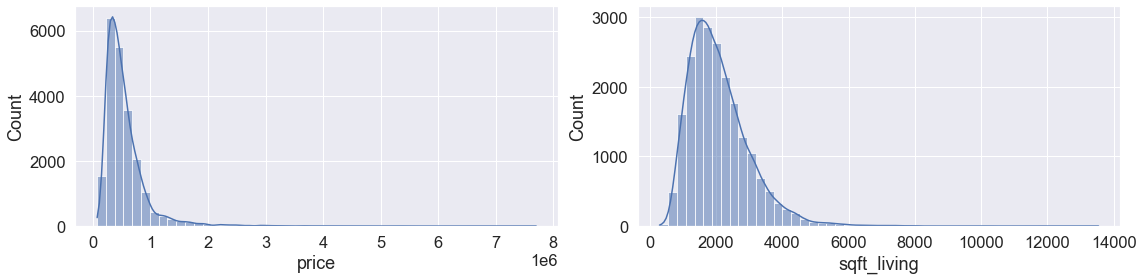

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
sns.histplot(data=data, x='price', kde=True, ax=ax1, bins=50)
sns.histplot(data=data, x='sqft_living', kde=True, ax=ax2, bins=50)
fig.tight_layout()

# Print basic statistics wtih `describe`


In [7]:
data.describe()

,price,sqft_living
count,2.161300e+04,21613.000000
mean,5.400881e+05,2079.899736
std,3.671272e+05,918.440897
min,7.500000e+04,290.000000
25%,3.219500e+05,1427.000000
50%,4.500000e+05,1910.000000
75%,6.450000e+05,2550.000000
max,7.700000e+06,13540.000000


# Plot box-plots


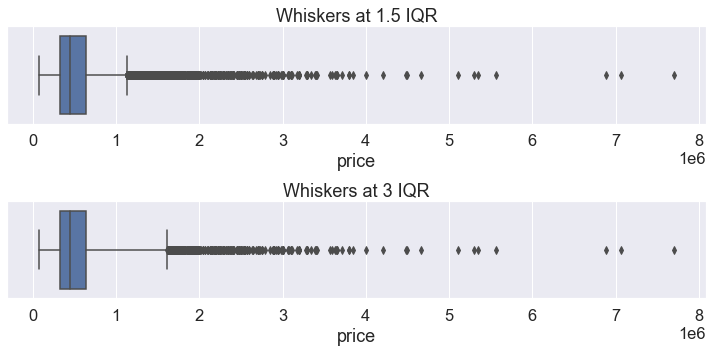

In [8]:
fig, axs = plt.subplots(2,1,figsize=(10,5))
axs[0].set_title('Whiskers at 1.5 IQR')
axs[1].set_title('Whiskers at 3 IQR')
sns.boxplot(data=data, x='price', whis=1.5, orient='horiz', ax=axs[0])
sns.boxplot(data=data, x='price', whis=3.0, orient='horiz', ax=axs[1])
fig.tight_layout()

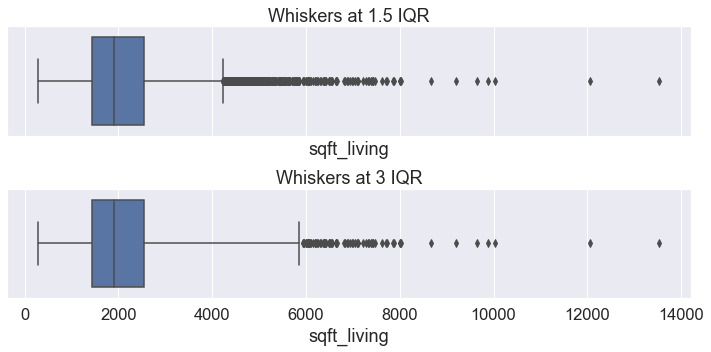

In [9]:
fig, axs = plt.subplots(2,1,sharex=True, figsize=(10,5))
axs[0].set_title('Whiskers at 1.5 IQR')
axs[1].set_title('Whiskers at 3 IQR')
sns.boxplot(data=data, x='sqft_living', whis=1.5, orient='horiz', ax=axs[0])
sns.boxplot(data=data, x='sqft_living', whis=3.0, orient='horiz', ax=axs[1])
fig.tight_layout()

# Regresssion based methods

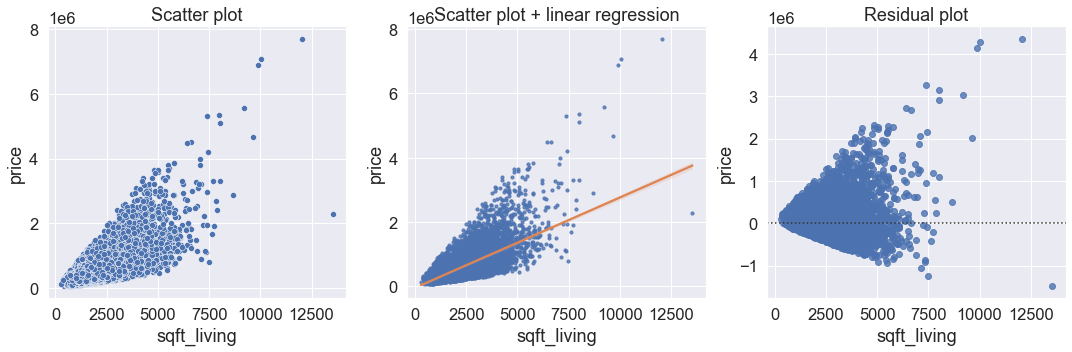

In [21]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
ax = axs[0]
ax.set_title('Scatter plot')
sns.scatterplot(data=data, x='sqft_living', y='price', ax=ax)
ax = axs[1]
ax.set_title('Scatter plot + linear regression')
sns.regplot(data=data, x='sqft_living', y='price', 
            line_kws={"color": "C1"}, scatter_kws={"s": 10}, ax=ax)
ax = axs[2]
ax.set_title('Residual plot')
sns.residplot(data=data, x='sqft_living', y='price', ax=ax)
fig.tight_layout()

## Use cook's distance


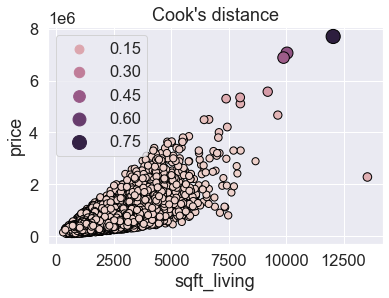

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence

# fit the regression model using statsmodels library 
f = 'price ~ sqft_living'
model = ols(formula=f, data=data).fit()

# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance

# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
sns.scatterplot(data=data, x="sqft_living", y="price", hue=distance,
                size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
plt.title('Cook\'s distance');

In [12]:
threshold = 4/data.shape[0]
influencial_data = distance[distance > threshold]
print(f'At threshold 4/N = {threshold:0.5f}, '
    f'{len(influencial_data)} samples are considered outliers '
    f'({np.mean(distance > threshold)*100:0.2f}% of the samples)')
influencial_data.describe()

At threshold 4/N = 0.00019, 1098 samples are considered outliers (5.08% of the samples)


count    1098.000000
mean        0.004001
std         0.032129
min         0.000185
25%         0.000257
50%         0.000463
75%         0.001197
max         0.773800
dtype: float64

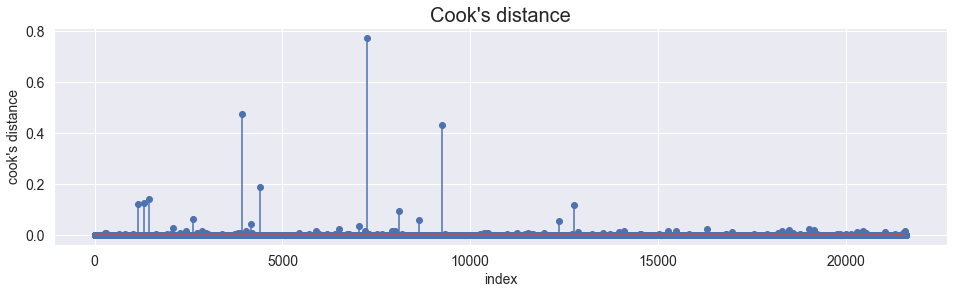

In [13]:

# stem plot - the x-axis represents the index of the observation and the y-axis its Cook's distance
plt.stem(distance, basefmt=" ")

# horizontal line showing the threshold value
plt.hlines(threshold, -2, 1+data.shape[0], 'r')

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('index', fontsize=14)
plt.ylabel('cook\'s distance', fontsize=14)
plt.title('Cook\'s distance', fontsize=20)
plt.gcf().set_size_inches(16,4);